<a href="https://colab.research.google.com/github/Oleksii-Adamov/university-models-of-intelligent-systems/blob/main/MIS_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Варіант 1

In [3]:
import pandas as pd
import numpy as np

# Load dataset from google drive

In [4]:
try:
  from google.colab import drive
  import os
  drive.mount('/content/drive')
  data_dir = 'drive/My Drive/MIS'
  os.makedirs(data_dir, exist_ok=True)
except ImportError:
  data_dir = '.'

Mounted at /content/drive


In [5]:
national_names_df = pd.read_csv(data_dir + '/NationalNames.csv')

#Вправи

## 1. Виведіть перші 8 рядків набору даних.

In [6]:
national_names_df[0:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## 2. Виведіть останні 8 рядків набору даних.

In [7]:
national_names_df[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## 3. Отримайте імена стовпців набору даних

In [8]:
national_names_df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

## 5. Знайдіть кількість унікальних імен у наборі даних

In [9]:
national_names_df['Name'].nunique()

93889

## 10. Підрахуйте кількість унікальних імен у кожному році

In [10]:
num_unique_names_by_year = national_names_df.groupby(['Year'])['Name'].nunique()
num_unique_names_by_year

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

## 11. Знайдіть рік із найбільшою кількістю унікальних імен

In [11]:
year_with_most_unique_names = num_unique_names_by_year.idxmax()
year_with_most_unique_names

2008

## 12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [12]:
names_for_2008 = national_names_df[national_names_df['Year'] == year_with_most_unique_names]
names_for_2008[names_for_2008['Count'] == names_for_2008['Count'].max()]

,Id,Name,Year,Gender,Count
1608302,1608303,Jacob,2008,M,22568


## 13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [16]:
jacob_f = national_names_df[(national_names_df['Name'] == 'Jacob') & (national_names_df['Gender'] == 'F')]
jacob_f[jacob_f['Count'] == jacob_f['Count'].max()]

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


## 14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [35]:
counts_by_year_name = national_names_df.groupby(['Year', 'Name']).count()
counts_by_year_gender_neutral = counts_by_year_name[counts_by_year_name['Count'] == 2].groupby(['Year']).count()
counts_by_year_gender_neutral[counts_by_year_gender_neutral['Count'] == counts_by_year_gender_neutral['Count'].max()].drop(columns = ['Gender', 'Id']).rename(columns = {'Count' : 'Gender_neutral_names'})

,Gender_neutral_names
Year,
2008,2557


## 15. Знайдіть загальну кількість народжень за рік.

In [38]:
number_of_births = national_names_df.groupby(['Year'])['Count'].sum()
pd.DataFrame(number_of_births)

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467
...,...
2010,3686589
2011,3646730
2012,3643336


## 16. Знайдіть рік, коли народилося найбільше дітей

In [39]:
number_of_births.idxmax()

1957

## 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [20]:
number_of_births_by_gender_grouped = pd.DataFrame(national_names_df.groupby(['Year', 'Gender'])['Count'].sum())
number_of_births_by_gender_grouped

Count
Year Gender         
1880 F         90993
     M        110491
1881 F         91954
     M        100745
1882 F        107850
...              ...
2012 M       1889414
2013 F       1745339
     M       1881463
2014 F       1768775
     M       1901376

[270 rows x 1 columns]

In [21]:
number_of_births_by_gender = number_of_births_by_gender_grouped.reset_index('Gender')
number_of_births_by_gender = number_of_births_by_gender[0::2].drop(columns=['Gender', 'Count'])
number_of_births_by_gender['F'] = number_of_births_by_gender_grouped[0::2].reset_index('Gender')['Count']
number_of_births_by_gender['M'] = number_of_births_by_gender_grouped[1::2].reset_index('Gender')['Count']
number_of_births_by_gender

,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


## 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [22]:
number_of_births_by_gender[number_of_births_by_gender['F'] > number_of_births_by_gender['M']].shape[0]

54

## 21. Порахуйте, скільки разів хлопчиків називали Barbara

In [25]:
national_names_df[(national_names_df['Gender'] == 'M') & (national_names_df['Name'] == 'Barbara')]['Count'].sum()

4139

## 22. Підрахуйте скільки років проводилось спостереження

In [27]:
num_years = national_names_df['Year'].nunique()
print(f'Спостереження проводилось {num_years} років')

Спостереження проводилось 135 років


## 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

In [58]:
counts_by_year_name = national_names_df.groupby(['Year', 'Name']).count()
counts_by_name_gender_neutral = counts_by_year_name[counts_by_year_name['Count'] == 2].reset_index('Year').groupby(['Name']).count()
counts_by_name_gender_neutral = counts_by_name_gender_neutral.reset_index('Name')
most_popular_gender_neutral_names = counts_by_name_gender_neutral[(counts_by_name_gender_neutral['Year'] == num_years)]['Name']
pd.DataFrame(most_popular_gender_neutral_names)

,Name
2979,Francis
3710,James
3922,Jean
4015,Jesse
4021,Jessie
4100,John
4109,Johnnie
4171,Joseph
5217,Lee
5286,Leslie


## 24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )

In [81]:
counts_by_name = national_names_df.groupby(['Name']).count()
counts_by_name['Count'] = national_names_df.groupby(['Name'])['Count'].sum()
non_popular_names = counts_by_name[counts_by_name['Year'] == counts_by_name['Year'].min()]
non_popular_names[non_popular_names['Count'] == non_popular_names['Count'].max()].drop(columns = ['Id', 'Gender'])

,Year,Count
Name,,
Christop,1,1082


## 26. Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.

<Axes: xlabel='Year'>

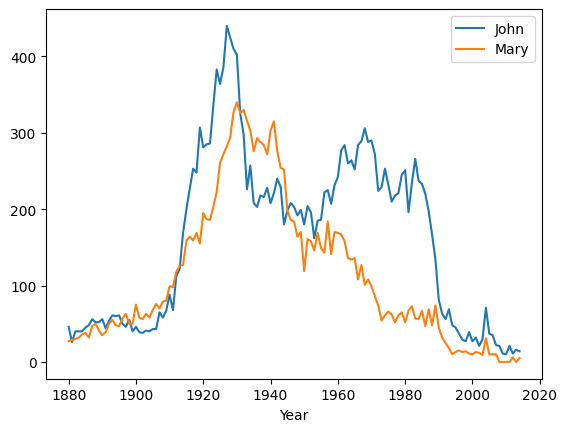

In [90]:
f_John = national_names_df[(national_names_df['Gender'] == 'F') & (national_names_df['Name'] == 'John')].groupby(['Year'])['Count'].sum()
m_Mary = national_names_df[(national_names_df['Gender'] == 'M') & (national_names_df['Name'] == 'Mary')].groupby(['Year'])['Count'].sum()
John_Mary_df = pd.DataFrame({'John': f_John, 'Mary': m_Mary})
John_Mary_df = John_Mary_df.fillna(0)
John_Mary_df.plot()